In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kunalmehra343","key":"5d543e54dd0b4dc0f6baf243d29ec0ad"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          10610        193  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                 496KB  2024-06-15 18:50:51           2252         59  1.0              
zeesolver/data-eng-salary-2024                                  Data Developer Salary in 2024💰                   108KB  2024-06-10 07:33:22           2328         31  1.0              
rabieelkharoua/students-performance-dataset                     📚 Students 

In [ ]:
!kaggle datasets download -d jainilcoder/online-payment-fraud-detection

Dataset URL: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection
License(s): CC0-1.0
 97% 173M/178M [00:02<00:00, 77.2MB/s]
100% 178M/178M [00:02<00:00, 65.2MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip online-payment-fraud-detection.zip

Archive:  online-payment-fraud-detection.zip
  inflating: onlinefraud.csv         


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("/content/onlinefraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
def transstring(i):
  return i[0]
data['name']=data['nameOrig'].apply(transstring)
data['Destn']=data['nameDest'].apply(transstring)
data = data.drop(columns=['nameOrig', 'nameDest','name'])
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Destn
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,M
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,M
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,C
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,C
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,M


# **Data encoding using pandas dummies**

In [ ]:
data_encoded=pd.get_dummies(data=data,columns=['type','Destn'])
data_encoded=data_encoded.drop(columns=['Destn_M'])
data_encoded.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Destn_C
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,False,False,False,True,False,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,False,False,False,True,False,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,False,False,False,False,True,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,False,True,False,False,False,True
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,False,False,False,True,False,False


# **Normalising coloumns**

In [ ]:
def norm_col(data,col):
  data[col]=(data[col]-data[col].min())/(data[col].max()-data[col].min())


In [ ]:
norm_cols=[
    'step',
    'amount',
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest'
]
for col in norm_cols:
  norm_col(data_encoded,col)
data_encoded

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Destn_C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True


# **Address Class Imbalance using under sampling**

In [ ]:
data_isFraud=data_encoded[data_encoded['isFraud']==1]
data_notFraud=data_encoded[data_encoded['isFraud']==0]
data_isFraud


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Destn_C
2,0.0,0.000002,0.000003,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.0,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.0,0.000030,0.000047,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.0,0.000030,0.000047,0.0,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.0,0.000218,0.000338,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.0,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.0,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True


In [ ]:
data_notFraud=data_notFraud.sample(n=len(data_isFraud))
data_notFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Destn_C
2637506,0.280323,0.001349,0.000000,0.000000,0.000432,0.000782,0,0,False,True,False,False,False,True
4012246,0.401617,0.003487,0.000031,0.000000,0.003705,0.004608,0,0,False,True,False,False,False,True
6080218,0.699461,0.001484,0.005476,0.003813,0.008538,0.008919,0,0,False,True,False,False,False,True
6095887,0.702156,0.000172,0.003872,0.004333,0.000000,0.000000,0,0,False,False,False,True,False,False
515779,0.025606,0.003238,0.000000,0.000000,0.001371,0.002211,0,0,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5644289,0.532345,0.001454,0.003541,0.001544,0.019887,0.020256,0,0,False,True,False,False,False,True
51860,0.010782,0.000127,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False
769529,0.051213,0.000180,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False
1033840,0.123989,0.000168,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False


In [ ]:
final_data=pd.concat([data_isFraud,data_notFraud])
final_data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Destn_C
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5644289,0.532345,0.001454,0.003541,0.001544,0.019887,0.020256,0,0,False,True,False,False,False,True
51860,0.010782,0.000127,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False
769529,0.051213,0.000180,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False
1033840,0.123989,0.000168,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False


In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# **Random Forest Model**

In [ ]:
# Split the data into features (X) and target (y)
X = final_data.drop('isFraud', axis=1)
y = final_data['isFraud']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9908703590992087


# Hyperparameter Tuning

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d292ec9c550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d2a06a13fd0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 14, 'n_estimators': 291}


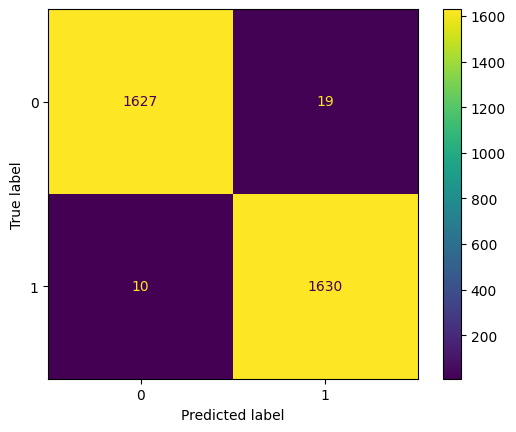

In [ ]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9911746804625685
Precision: 0.9884778653729533
Recall: 0.9939024390243902


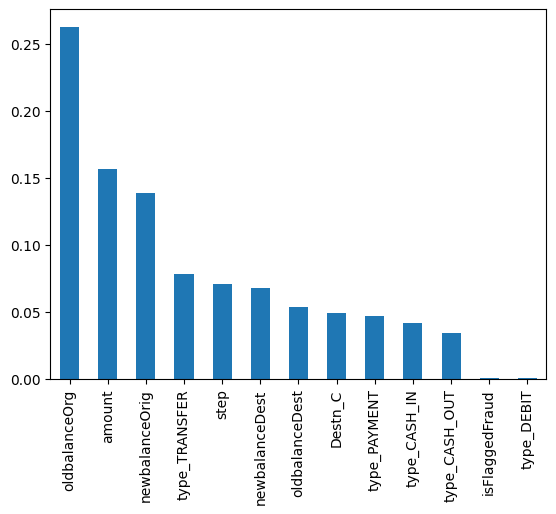

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();